In [1]:
# importing Libraries related to Regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor


# Loading Dataset

In [2]:
# Fetching California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Exploratory data analysis (EDA)

In [3]:
# Dataset Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# Dataset Summary
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# Checking Missing Values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [6]:
# Checking Data Types
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [7]:
# Checking Duplicates
df.duplicated().sum()

np.int64(0)

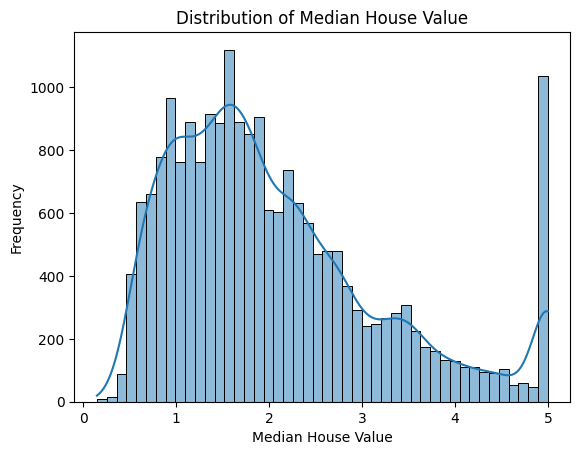

In [8]:
#plotting the distribution of target variable
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

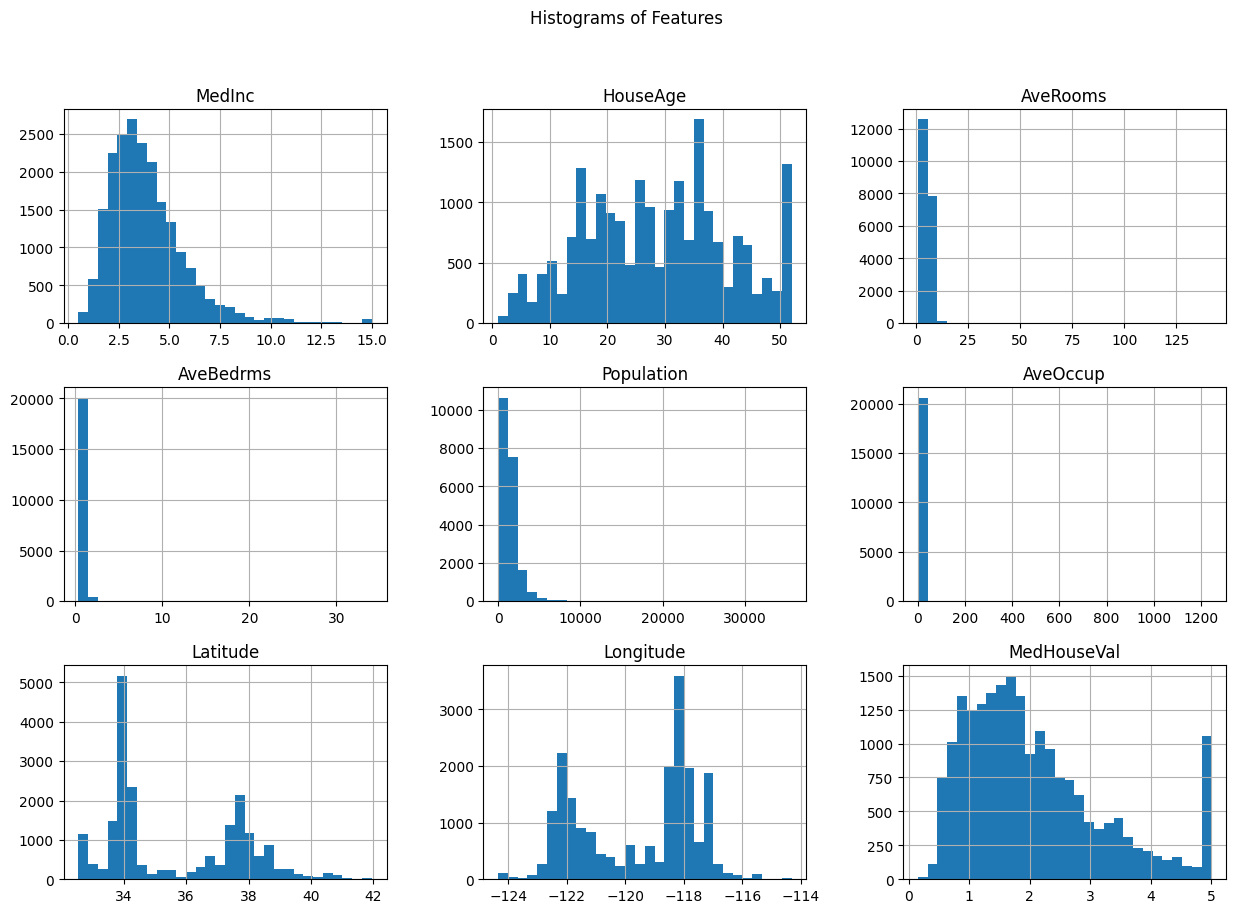

In [9]:
# plotting the histogram of all features
df.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Features')
plt.show()

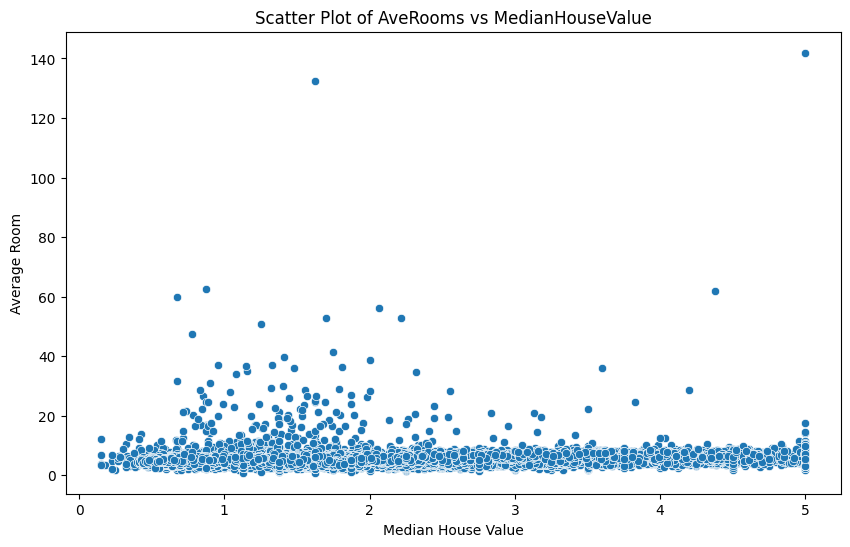

In [10]:
# plotting the scatter plot of AveRoom vs MedianHouseValue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='AveRooms', x='MedHouseVal')
plt.title('Scatter Plot of AveRooms vs MedianHouseValue')
plt.ylabel('Average Room')
plt.xlabel('Median House Value')
plt.show()

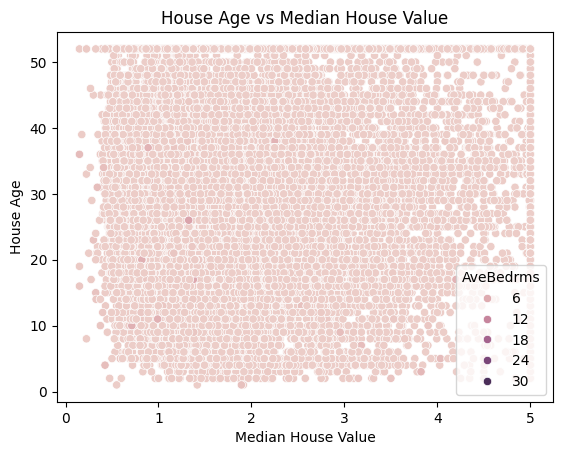

In [11]:
# plotting HouseAge VS MedHouseVal
sns.scatterplot(data=df, y='HouseAge', x='MedHouseVal', hue='AveBedrms')
plt.title('House Age vs Median House Value')
plt.ylabel('House Age')
plt.xlabel('Median House Value')
plt.show()

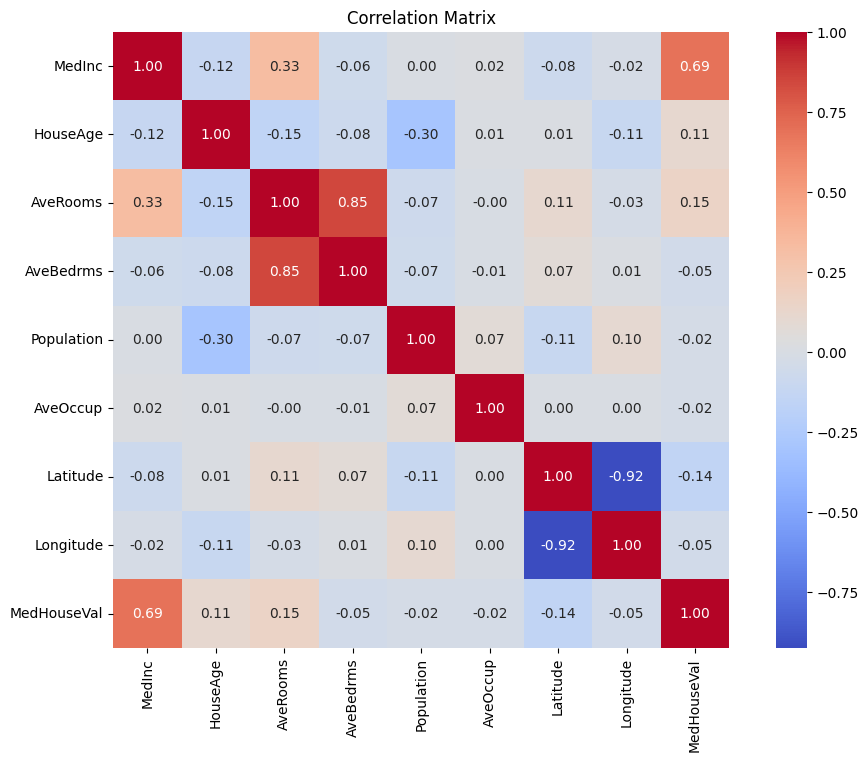

In [12]:
# plotting the corr matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### Data Wrangling

In [13]:
# Feature Engineering
# Create new features based on existing columns

# Rooms per household
df['RoomsPerHousehold'] = df['AveRooms'] / df['AveOccup']

# Bedrooms per room
df['BedroomsPerRoom'] = df['AveBedrms'] / df['AveRooms']

# Population per household
df['PopulationPerHousehold'] = df['Population'] / df['AveOccup']

# Median income squared (to capture non-linear effects)
df['MedInc_Sq'] = df['MedInc'] ** 2

# Interaction feature: Median income * House age
df['MedInc_HouseAge'] = df['MedInc'] * df['HouseAge']

# Binned HouseAge (categorical feature)
df['HouseAgeBin'] = pd.cut(df['HouseAge'], bins=[0, 10, 20, 30, 40, 50, np.inf], labels=['0-10','11-20','21-30','31-40','41-50','50+'])

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,RoomsPerHousehold,BedroomsPerRoom,PopulationPerHousehold,MedInc_Sq,MedInc_HouseAge,HouseAgeBin
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919,0.146591,126.0,69.308955,341.3332,41-50
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685,0.155797,1138.0,68.913242,174.3294,21-30
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661,0.129516,177.0,52.669855,377.3848,50+
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154,0.184458,219.0,31.844578,293.4412,50+
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.879646,0.172096,259.0,14.793254,200.0024,50+


In [ ]:
# encoding the categorical features
encoder = LabelEncoder()
df['HouseAgeBin'] = encoder.fit_transform(df['HouseAgeBin'])

In [ ]:
# droping the the columns with which we make new columns
columns = ['AveRooms', 'AveOccup', 'AveBedrms', 'Population', 'MedInc', 'HouseAge']
df.drop(columns=columns, inplace=True)

In [24]:
df.head()

,Latitude,Longitude,MedHouseVal,RoomsPerHousehold,BedroomsPerRoom,PopulationPerHousehold,MedInc_Sq,MedInc_HouseAge,HouseAgeBin
0,37.88,-122.23,4.526,2.732919,0.146591,126.0,69.308955,341.3332,4
1,37.86,-122.22,3.585,2.956685,0.155797,1138.0,68.913242,174.3294,2
2,37.85,-122.24,3.521,2.957661,0.129516,177.0,52.669855,377.3848,5
3,37.85,-122.25,3.413,2.283154,0.184458,219.0,31.844578,293.4412,5
4,37.85,-122.25,3.422,2.879646,0.172096,259.0,14.793254,200.0024,5


In [21]:
# Data processing

# splitting the data into features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Dividing the data into Train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Modeling

Linear Regression R^2 Score: 0.5799806759774684
Linear Regression Mean Squared Error: 0.550397093233799
Linear Regression Mean Absolute Error: 0.5236644985290876


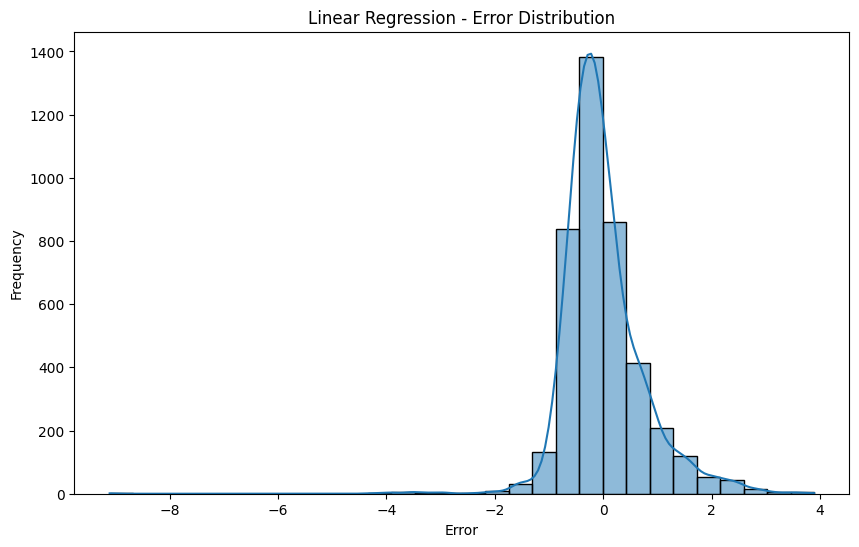

Random Forest R^2 Score: 0.807245941421971
Random Forest Mean Squared Error: 0.25258664895302146
Random Forest Mean Absolute Error: 0.3252585822916668


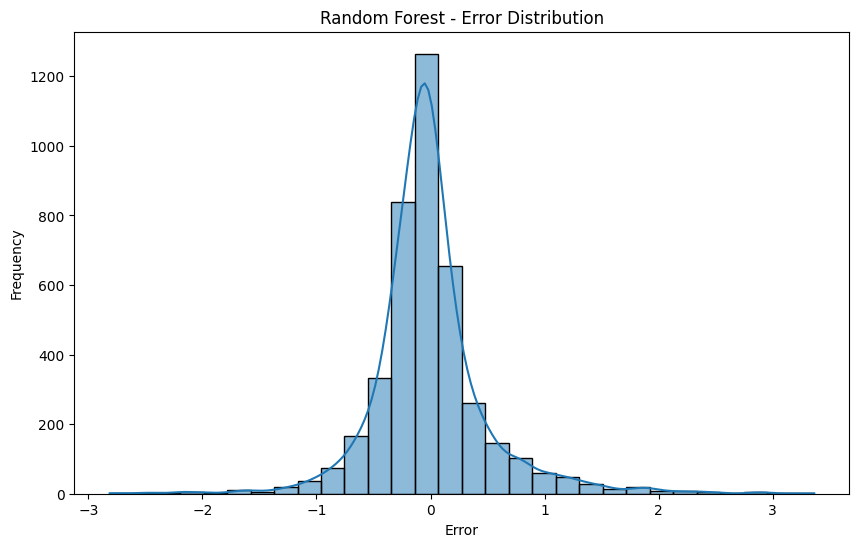

DecisionTreeRegressor R^2 Score: 0.6010368384000565
DecisionTreeRegressor Mean Squared Error: 0.5228049089479408
DecisionTreeRegressor Mean Absolute Error: 0.45127052083333336


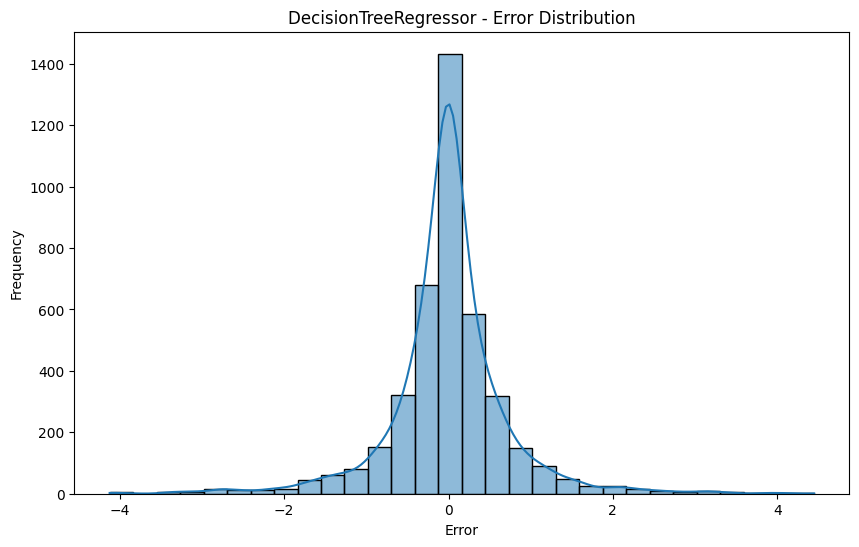

SVR R^2 Score: 0.7576236223048716
SVR Mean Squared Error: 0.31761218144520353
SVR Mean Absolute Error: 0.37348775788379857


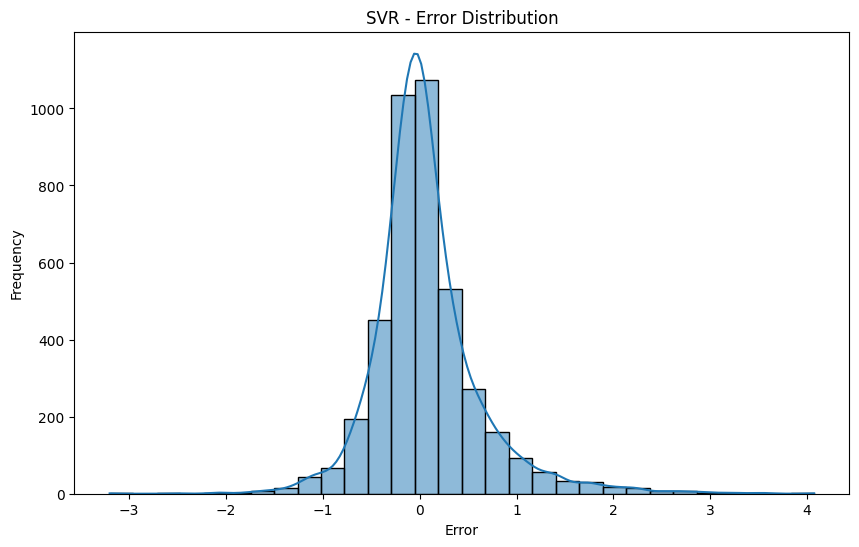

KNeighborsRegressor R^2 Score: 0.7149437265086043
KNeighborsRegressor Mean Squared Error: 0.3735403000870184
KNeighborsRegressor Mean Absolute Error: 0.40760759060077517


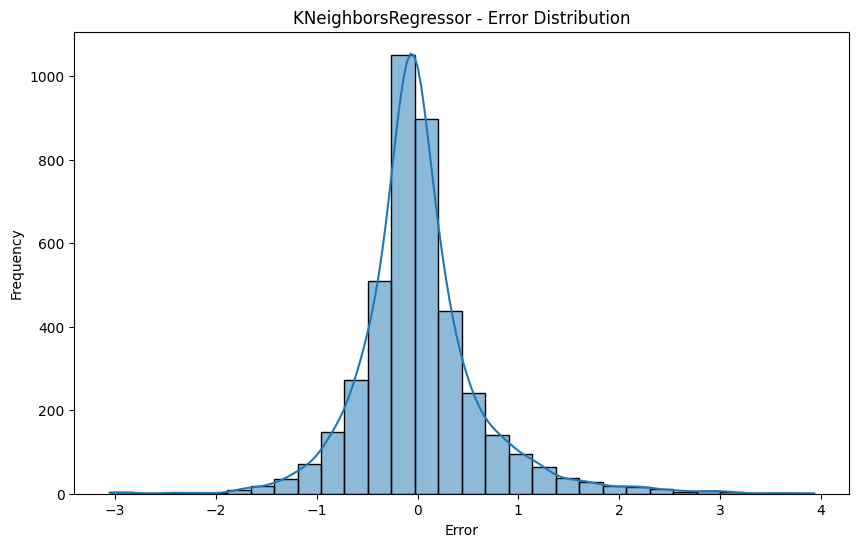

XGBoost R^2 Score: 0.8347959653179922
XGBoost Mean Squared Error: 0.21648485028892409
XGBoost Mean Absolute Error: 0.3040772710264468


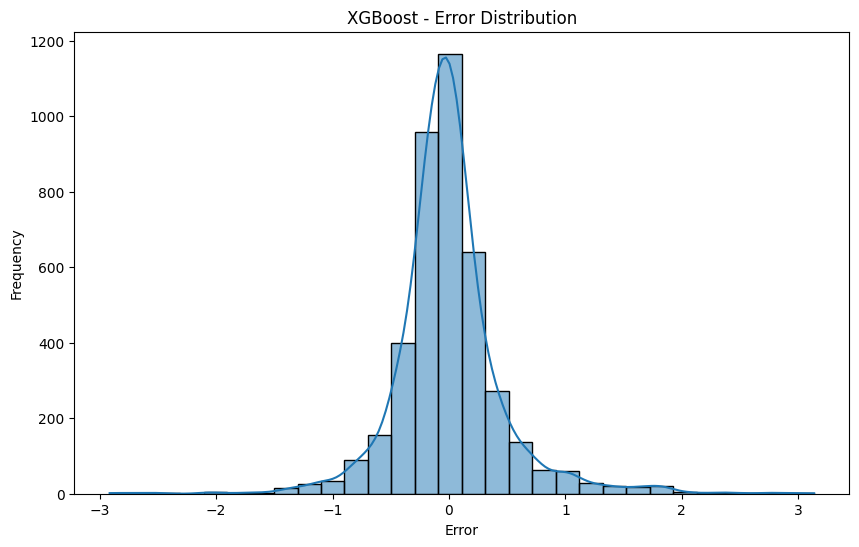

In [22]:
# Training the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} R^2 Score: {r2_score(y_test, y_pred)}")
    print(f"{name} Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"{name} Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    # plotting the distribution of errors
    plt.figure(figsize=(10, 6))
    sns.histplot(y_test - y_pred, bins=30, kde=True)
    plt.title(f"{name} - Error Distribution")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()

In [23]:
# comparing the performance of all models using DataFrame
results = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "R2": []
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results["Model"].append(name)
    results["MAE"].append(mean_absolute_error(y_test, y_pred))
    results["MSE"].append(mean_squared_error(y_test, y_pred))
    results["R2"].append(r2_score(y_test, y_pred))
results_df = pd.DataFrame(results)
print(results_df)
print("<-------------------------------------------->")

                   Model       MAE       MSE        R2
0      Linear Regression  0.523664  0.550397  0.579981
1          Random Forest  0.327143  0.256133  0.804540
2  DecisionTreeRegressor  0.447396  0.498845  0.619321
3                    SVR  0.373488  0.317612  0.757624
4    KNeighborsRegressor  0.407608  0.373540  0.714944
5                XGBoost  0.304077  0.216485  0.834796
<-------------------------------------------->


## Creating a Pipeline of Best Model

In [19]:
The `Pipeline` function in scikit-learn is a powerful tool that allows you
to bundle multiple preprocessing steps and a machine learning model into a 
single, streamlined workflow. By chaining together operations such as scaling,
encoding, and model fitting, a pipeline ensures that all steps are executed in 
the correct order and that data leakage is prevented during model evaluation.
This approach not only simplifies code management and improves reproducibility 
but also makes it easier to perform tasks like cross-validation and hyperparameter 
tuning, as the entire sequence of steps can be treated as a single estimator.
Using a pipeline is especially useful when you need to apply the same transformations
to both training and test data, ensuring consistency and reliability in your machine learning workflow.



SyntaxError: invalid syntax (193576523.py, line 1)

In [ ]:
# Creating a pipline of best model
pipeline = Pipeline(steps=[("scaler",StandardScaler()),("model",XGBRegressor())])
pipeline.fit(x_train, y_train)
pipeline.predict(x_test)
print(pipeline.score(x_test, y_test))

0.8301370561019205


## Summary of Dataset

1. **Data Loading**  
    - The California Housing dataset was loaded using `fetch_california_housing` from scikit-learn.
    - The dataset was converted into a pandas DataFrame for easier manipulation and analysis.

2. **Exploratory Data Analysis (EDA)**  
    - Inspected the structure and summary statistics of the dataset using `.info()` and `.describe()`.
    - Checked for missing values and duplicates, confirming data quality.
    - Visualized the distribution of the target variable (`MedHouseVal`) and all features using histograms.
    - Explored relationships between features and the target variable with scatter plots (e.g., `AveRooms` vs. `MedHouseVal`, `HouseAge` vs. `MedHouseVal`).
    - Examined feature correlations using a heatmap to identify potential multicollinearity and important predictors.

3. **Data Wrangling**  
    - Split the dataset into features (`X`) and target (`y`).
    - Applied feature scaling using `StandardScaler` to standardize the input features.
    - Divided the data into training and testing sets to enable unbiased model evaluation.

4. **Modeling Preparation**  
    - Prepared both scaled and unscaled versions of the training and testing data for flexibility in model experimentation.
    - Ensured all preprocessing steps were completed before moving on to model training and evaluation.

This systematic approach ensured the data was clean, well-understood, and ready for robust machine learning modeling.